# SI: On the Oddness ofAb InitoParameterization ofFormamide:  Reproduction of the Static DielectricConstant
_Stefan Hervø-Hansen, Mikael Lund, and Erik Hedegård, Division of Theoreical Chemistry, Lund University_

In [1]:
import parmed as pmd
import math
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
from simtk.openmm import app
import simtk.openmm as mm
import os

workdir='/lunarc/nobackup/users/hervoe/QM_calculations/MD_simulations'

### Charge methods and their associated charges

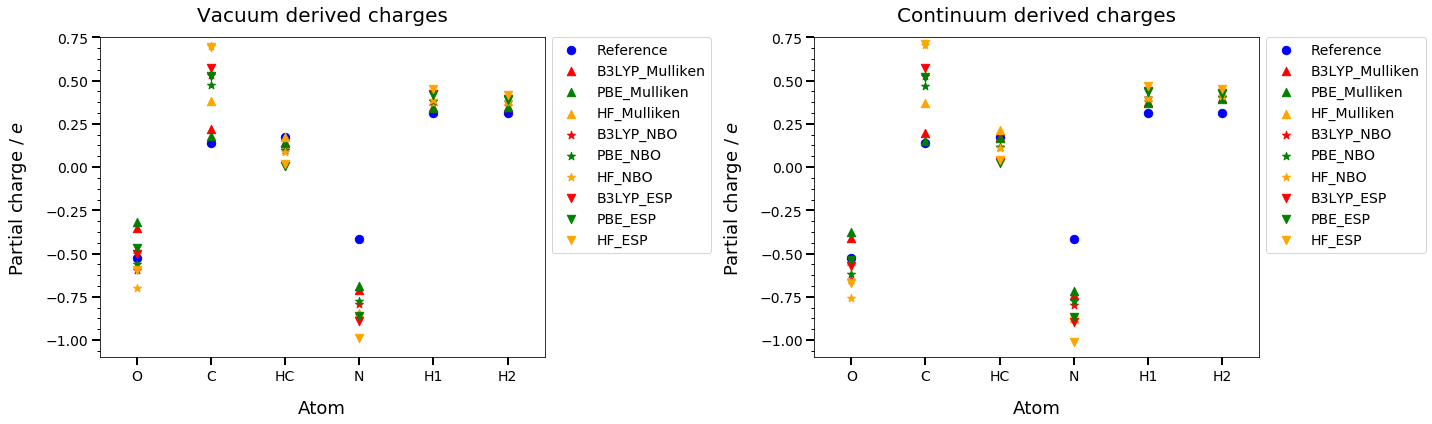

In [2]:
charge_method = {'Reference'       : {'O': -0.528300, 'C': 0.139800, 'HC': 0.175300, 'N': -0.416300, 'H1': 0.314750, 'H2': 0.314750},
                 'B3LYP_Mulliken'  : {'O': -0.352351, 'C': 0.221157, 'HC': 0.143834, 'N': -0.710676, 'H1': 0.348903, 'H2': 0.349133},
                 'PBE_Mulliken'    : {'O': -0.318781, 'C': 0.179901, 'HC': 0.139510, 'N': -0.689939, 'H1': 0.343919, 'H2': 0.345390},
                 'HF_Mulliken'     : {'O': -0.476443, 'C': 0.379936, 'HC': 0.173585, 'N': -0.841807, 'H1': 0.384997, 'H2': 0.379732},
                 'B3LYP_NBO'       : {'O': -0.595320, 'C': 0.531970, 'HC': 0.097170, 'N': -0.793250, 'H1': 0.383070, 'H2': 0.376360},
                 'PBE_NBO'         : {'O': -0.560540, 'C': 0.475940, 'HC': 0.099560, 'N': -0.774180, 'H1': 0.382670, 'H2': 0.376550},
                 'HF_NBO'          : {'O': -0.697340, 'C': 0.700640, 'HC': 0.086490, 'N': -0.858100, 'H1': 0.389050, 'H2': 0.379260},
                 'B3LYP_ESP'       : {'O': -0.503808, 'C': 0.572960, 'HC': 0.006582, 'N': -0.889585, 'H1': 0.422276, 'H2': 0.391575},
                 'PBE_ESP'         : {'O': -0.469352, 'C': 0.524465, 'HC': 0.005085, 'N': -0.862632, 'H1': 0.415769, 'H2': 0.386665},
                 'HF_ESP'          : {'O': -0.593001, 'C': 0.696680, 'HC': 0.018631, 'N': -0.989109, 'H1': 0.451529, 'H2': 0.415270},
                }

charge_method_solvated = {'Reference'       : {'O': -0.528300, 'C': 0.139800, 'HC': 0.175300, 'N': -0.416300, 'H1': 0.314750, 'H2': 0.314750},
                          'B3LYP_Mulliken_S': {'O': -0.409852, 'C': 0.198211, 'HC': 0.176687, 'N': -0.738484, 'H1': 0.375492, 'H2': 0.397946},
                          'PBE_Mulliken_S'  : {'O': -0.373676, 'C': 0.152432, 'HC': 0.170020, 'N': -0.716642, 'H1': 0.372524, 'H2': 0.395342},
                          'HF_Mulliken_S'   : {'O': -0.542110, 'C': 0.369600, 'HC': 0.213427, 'N': -0.875320, 'H1': 0.407329, 'H2': 0.427074},
                          'B3LYP_NBO_S'     : {'O': -0.651570, 'C': 0.527270, 'HC': 0.117460, 'N': -0.797250, 'H1': 0.397890, 'H2': 0.406200},
                          'PBE_NBO_S'       : {'O': -0.615550, 'C': 0.468630, 'HC': 0.117950, 'N': -0.776230, 'H1': 0.398430, 'H2': 0.406770},
                          'HF_NBO_S'        : {'O': -0.757580, 'C': 0.703550, 'HC': 0.111810, 'N': -0.868860, 'H1': 0.401420, 'H2': 0.409660},
                          'B3LYP_ESP_S'     : {'O': -0.573487, 'C': 0.572991, 'HC': 0.027656, 'N': -0.898324, 'H1': 0.442190, 'H2': 0.428974},
                          'PBE_ESP_S'       : {'O': -0.536745, 'C': 0.518956, 'HC': 0.024670, 'N': -0.868831, 'H1': 0.437066, 'H2': 0.424884},
                          'HF_ESP_S'        : {'O': -0.669509, 'C': 0.714502, 'HC': 0.042381, 'N': -1.009529, 'H1': 0.469327, 'H2': 0.452828},
                         }

fig = plt.figure(figsize=(2*10,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for method, charges in zip(charge_method.keys(), charge_method.values()):
    if 'Reference' in method:
        marker = 'o'
        color = 'blue'
    elif 'Mulliken' in method:
        marker = '^'
    elif 'NBO' in method:
        marker = '*'
    elif 'ESP' in method:
        marker = 'v'
    
    if 'B3LYP' in method:
        color = 'red'
    elif 'PBE' in method:
        color = 'green'
    elif 'HF' in method:
        color = 'orange'
        
    ax1.scatter(range(len(charges)), list(charges.values()), label=str(method), marker=marker, color=color, s=70)
    
for method, charges in zip(charge_method_solvated.keys(), charge_method_solvated.values()):
    if 'Reference' in method:
        marker = 'o'
        color = 'blue'
    elif 'Mulliken' in method:
        marker = '^'
    elif 'NBO' in method:
        marker = '*'
    elif 'ESP' in method:
        marker = 'v'
    
    if 'B3LYP' in method:
        color = 'red'
    elif 'PBE' in method:
        color = 'green'
    elif 'HF' in method:
        color = 'orange'
        
    ax2.scatter(range(len(charges)), list(charges.values()), label=str(method).rsplit('_',1)[0], marker=marker, color=color, s=70)

# Graphics settings
for i, ax in enumerate([ax1,ax2]):
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(-1.1, 0.75)
    ax.set_xticks(list(range(len(charges))))
    ax.set_xticklabels(list(charges.keys()))
    ax.set_xlabel(r'Atom', fontsize=18, labelpad=16)
    ax.set_ylabel(r'Partial charge / $\it{e}$', fontsize=18, labelpad=16)
    ax.tick_params(axis='both',which='major',length=8,width=2,labelsize=14)
    ax.minorticks_on()
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.tick_params(axis='y',which='minor',length=3,width=1,labelsize=18)
    ax.legend(bbox_to_anchor=(1.,1.022), loc="upper left", prop={'size': 14})
    if i == 0:
        ax.set_title(r'Vacuum derived charges', fontsize=20, pad=16)
    if i == 1:
        ax.set_title(r'Continuum derived charges', fontsize=20, pad=16)

plt.tight_layout()
#plt.savefig('charges_v2.pdf')
plt.show()

### System Check for Molecular Dynamics: Force field parameter and system neutrality

In [3]:
%cd -q /lunarc/nobackup/users/hervoe/QM_calculations/MD_simulations
init_conf = pmd.load_file('formamide.top', xyz='formamide_500.gro')

charge_method.update(charge_method_solvated)

l = []
for method, charges in zip(charge_method.keys(), charge_method.values()):
    System_charge = 0
    for atom in init_conf.atoms:
        System_charge += charges[atom.name]
    if not math.isclose(System_charge, 0, abs_tol=1e-9):
        l.append([method,System_charge])
if not l:
    print('All charge schemes yield electroneutrality within the tolerance limit (1e-9)')
else:
    print('WARNING: Following charge schemes violate electroneutrality within the tolerance limit (1e-9)')
    for method in l:
        print(method[0]+', System Charge:'+str(method[1]))

print('\nFormamide LJ parameters (sigma [Å] & epsilon [kcal/mol]):\n{}: {}\t{}\n{}: {}\t\t{}\n{}: {}\t\t{}\n{}: {}\t{}\n{}: {}\t\t\t{}\n{}: {}\t\t\t{}\n'.format(init_conf.atoms[0].name,init_conf.atoms[0].sigma,init_conf.atoms[0].epsilon,
                                                                                                                                    init_conf.atoms[1].name,init_conf.atoms[1].sigma,init_conf.atoms[1].epsilon,
                                                                                                                                    init_conf.atoms[2].name,init_conf.atoms[2].sigma,init_conf.atoms[2].epsilon,
                                                                                                                                    init_conf.atoms[3].name,init_conf.atoms[3].sigma,init_conf.atoms[3].epsilon,
                                                                                                                                    init_conf.atoms[4].name,init_conf.atoms[4].sigma,init_conf.atoms[4].epsilon,
                                                                                                                                    init_conf.atoms[5].name,init_conf.atoms[5].sigma,init_conf.atoms[5].epsilon))
    
print('Box volume: {} Å\u00b3'.format(init_conf.box[0]*init_conf.box[1]*init_conf.box[2]))
init_conf

All charge schemes yield electroneutrality within the tolerance limit (1e-9)

Formamide LJ parameters (sigma [Å] & epsilon [kcal/mol]):
O: 3.0043999999999995	0.147
C: 3.80625		0.0735
HC: 2.4563		0.010499999999999999
N: 3.2987499999999996	0.119
H1: 0.0			0.0
H2: 0.0			0.0

Box volume: 33202.443556749306 Å³


<GromacsTopologyFile 3000 atoms; 500 residues; 2500 bonds; PBC (orthogonal); parametrized>

### Create OpenMM system

In [ ]:
for method, charges in zip(charge_method.keys(), charge_method.values()):
    %cd -q $workdir
    if not os.path.isdir(method):
        %mkdir -p $method
    else:
        continue
    %cd -q $workdir/$method
    
    openmm_script="""
# Imports
import sys
from simtk.openmm import app
import simtk.openmm as mm
from parmed import load_file, unit as u
from parmed.openmm import StateDataReporter
homedir='/lunarc/nobackup/users/hervoe/QM_calculations/MD_simulations/'

print('Loading initial configuration and toplogy')
init_conf = init_conf = load_file(homedir+'formamide.top', xyz=homedir+'formamide_500.gro')

# Changing change
QM_charges = {QM_charges}
if QM_charges:
    for atom in init_conf.atoms:
        atom.charge = QM_charges[atom.name]

print('Creating OpenMM System')
system = init_conf.createSystem(nonbondedMethod=app.PME, ewaldErrorTolerance=0.0005,
                                nonbondedCutoff=1.2*u.nanometers, constraints=app.HBonds)

# Temperature-coupling by Langevin (NVT)
integrator = mm.LangevinIntegrator(300*u.kelvin,       # Temperatue of heat bath
                                   1.0/u.picoseconds,  # Friction coefficient
                                   2.0*u.femtosecond,  # Time step of integration
                                  )

# Pressure-coupling (NPT)
system.addForce(mm.MonteCarloBarostat(1*u.bar, 300*u.kelvin, 25))

platform = mm.Platform.getPlatformByName('CUDA')
properties = {{'CudaPrecision': 'mixed', 'CudaDeviceIndex': '0,1,2,3'}}

# Create the Simulation object
sim = app.Simulation(init_conf.topology, system, integrator, platform, properties)

# Set the particle positions
sim.context.setPositions(init_conf.positions)

# Minimize the energy
print('Minimizing energy')
sim.minimizeEnergy(tolerance=1*u.kilojoule/u.mole, maxIterations=500000)

# Draw initial MB velocities
sim.context.setVelocitiesToTemperature(300*u.kelvin)

# Set up the reporters
sim.reporters.append(app.StateDataReporter(sys.stdout, 1000, totalSteps=25000000,
    time=True, potentialEnergy=True, kineticEnergy=True, temperature=True, density=True,
    remainingTime=True, speed=True, separator='\t'))

sim.reporters.append(app.DCDReporter('out.dcd', 1000, append=False))

# Run dynamics
print('Running dynamics')
sim.step(2*25000000)   # 25000000 * 0.2 fs = 50 ns"""
    
    if method == 'Reference':
        QM_charges = None

    with open('run_openMM.py', 'w') as text_file:
        text_file.write(openmm_script.format(QM_charges=charges))
    print('Wrote run_openMM.py to'+os.getcwd())

In [ ]:
for method in charge_method.keys():
    %cd -q $workdir
    if os.path.isfile(method+'/out.dcd'):
        continue
    else:
        %cd -q $workdir/$method
    
    
        aurora_script="""#!/bin/bash
#SBATCH --job-name=FMD_{method}
#SBATCH --nodes=1
#SBATCH --ntasks=5
#SBATCH --gres=gpu:1
#SBATCH --time=100:00:00
#SBATCH --account=lu2019-2-15
#SBATCH --partition=gpu
#SBATCH -o scn.out
#SBATCH -e scn.err

module purge
module load GCC/7.3.0-2.30
module load CUDA/9.2.88

export CUDA_VISIBLE_DEVICES=0,1,2,3

python run_openMM.py"""

        with open('aurora.sh', 'w') as text_file:
            text_file.write(aurora_script.format(method=method))
        print('Wrote aurora.sh to'+os.getcwd())
        !sbatch aurora.sh

## Calculation of the static dielectric constant

Reference
B3LYP_Mulliken
PBE_Mulliken
HF_Mulliken
B3LYP_NBO
PBE_NBO
HF_NBO
B3LYP_ESP
PBE_ESP
HF_ESP
Reference
B3LYP_Mulliken_S
PBE_Mulliken_S
HF_Mulliken_S
B3LYP_NBO_S
PBE_NBO_S
HF_NBO_S
B3LYP_ESP_S
PBE_ESP_S
HF_ESP_S


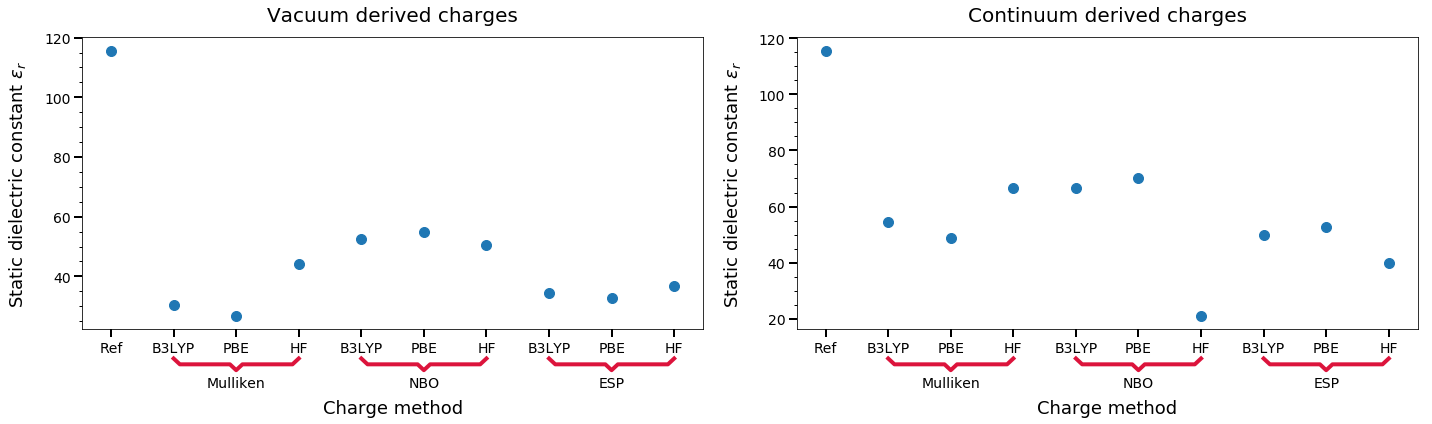

In [4]:
%cd -q $workdir
fig = plt.figure(figsize=(2*10,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for j, ax in enumerate([ax1,ax2]):
    
    eps_list = []
    
    for i, (method, charges) in enumerate(zip(charge_method.keys(), charge_method.values())):
        if i >= 10 and j == 0:
            break
        elif 1 <= i < 10 and j == 1:
            continue
        charge_list = []
        traj = md.load_dcd(method+'/out.dcd', top='formamide_500.gro')
        for atom in init_conf.atoms:
            charge_list.append(charges[atom.name])
        eps = md.static_dielectric(traj=traj, charges=charge_list, temperature=300)
        eps_list.append(eps)
        print(method)
        
    def bracket(ax, pos=[0,0], scalex=1, scaley=1, text="",textkw = {}, linekw = {}):
        x = np.array([0, 0.05, 0.45,0.5])
        y = np.array([0,-0.01,-0.01,-0.02])
        x = np.concatenate((x,x+0.5)) 
        y = np.concatenate((y,y[::-1]))
        ax.plot(x*scalex+pos[0], y*scaley+pos[1], clip_on=False, 
                transform=ax.get_xaxis_transform(), **linekw)
        ax.text(pos[0]+0.5*scalex, (y.min()-0.01)*scaley+pos[1], text, 
                    transform=ax.get_xaxis_transform(),
                    ha="center", va="top", **textkw,fontsize=14)
    
    xlabels = []
    for i in list(charge_method):
        if i == str('Reference'):
            xlabels.append('Ref')
        else:
            xlabels.append(i.split('_', 1)[0])
        
    ax.scatter(range(len(eps_list)), eps_list, s=100)
    ax.set_xticks(list(range(len(charge_method))))
    ax.set_xticklabels(xlabels)
    
    bracket(ax, text="Mulliken", pos=[1,-0.1], linekw=dict(color="crimson", lw=4), scalex=2, scaley=2)
    bracket(ax, text="NBO", pos=[4,-0.1], linekw=dict(color="crimson", lw=4), scalex=2, scaley=2)
    bracket(ax, text="ESP", pos=[7,-0.1], linekw=dict(color="crimson", lw=4), scalex=2, scaley=2)
    ax.set_xlabel(r'Charge method', fontsize=18, labelpad=44)
    ax.set_ylabel(r'Static dielectric constant $\epsilon_{r}$', fontsize=18, labelpad=16)
    ax.tick_params(axis='both',which='major',length=8,width=2,labelsize=14)
    ax.minorticks_on()
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.tick_params(axis='y',which='minor',length=3,width=1,labelsize=18)
    if j == 0:
        ax.set_title(r'Vacuum derived charges', fontsize=20, pad=16)
    if j == 1:
        ax.set_title(r'Continuum derived charges', fontsize=20, pad=16)

plt.tight_layout()
plt.savefig('static_dielectic_v2.pdf')
plt.show()

## Calculation of dipole moment from population analysis

In [5]:
test = md.load_pdb('test3.pdb')
charges           = [-0.528300, 0.139800, 0.175300, -0.416300, 0.314750, 0.314750]
charges_B3LYP_ESP = [-0.503808, 0.572960, 0.006582, -0.889585, 0.422276, 0.391575]
charges_PBE_ESP   = [-0.469352, 0.524465, 0.005085, -0.862632, 0.415769, 0.386665]
charges_HF_ESP    = [-0.593001, 0.696680, 0.018631, -0.989109, 0.451529, 0.415270]
charges_B3LYP_Mul = [-0.352351, 0.221157, 0.143834, -0.710676, 0.348903, 0.349133]
charges_PBE_Mul   = [-0.318781, 0.179901, 0.139510, -0.689939, 0.343919, 0.345390]
charges_HF_Mul    = [-0.476443, 0.379936, 0.173585, -0.841807, 0.384997, 0.379732]

In [6]:
dipole = md.dipole_moments(test, charges=charges)
dipole_B3LYP_ESP = md.dipole_moments(test, charges=charges_B3LYP_ESP)
dipole_PBE_ESP   = md.dipole_moments(test, charges=charges_PBE_ESP)
dipole_HF_ESP    = md.dipole_moments(test, charges=charges_HF_ESP)
dipole_B3LYP_Mul = md.dipole_moments(test, charges=charges_B3LYP_Mul)
dipole_PBE_Mul   = md.dipole_moments(test, charges=charges_PBE_Mul)
dipole_HF_Mul    = md.dipole_moments(test, charges=charges_HF_Mul)

In [7]:
unit_conversion = 48.032047 # Debye / (elementary charge*nanometer)
print(np.linalg.norm(dipole) * unit_conversion)
print(np.linalg.norm(dipole_B3LYP_ESP) * unit_conversion)
print(np.linalg.norm(dipole_PBE_ESP) * unit_conversion)
print(np.linalg.norm(dipole_HF_ESP) * unit_conversion)
print(np.linalg.norm(dipole_B3LYP_Mul) * unit_conversion)
print(np.linalg.norm(dipole_PBE_Mul) * unit_conversion)
print(np.linalg.norm(dipole_HF_Mul) * unit_conversion)

5.505854830836398
3.9034576122222346
3.777821027456804
4.263539374458287
3.45581863724246
3.302958707684941
4.040175184959941
